In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageEnhance

(1000, 707, 3)
RGB


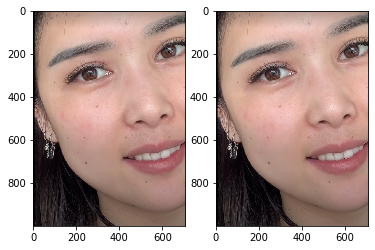

In [3]:
img = cv2.imread("week1_homework.png")  #opencv读入图片是BGR格式，显示时需调整为RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_pil = Image.open("week1_homework.png")#利用PIL库读取图片，图片格式的为RGB
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_pil)
print(img.shape)
print(img_pil.mode)

In [4]:
def gaussian_filter(img, K_size=3, sigma=1.3):
    if len(img.shape) == 3:
        H, W, C = img.shape
    else:
        img = np.expand_dims(img, axis=-1)
        H, W, C = img.shape
    ## Zero padding
    pad = K_size // 2
    out = np.zeros((H + pad * 2, W + pad * 2, C), dtype=np.float)
    out[pad: pad + H, pad: pad + W] = img.copy().astype(np.float)
    ## prepare Kernel
    K = np.zeros((K_size, K_size), dtype=np.float)
    for x in range(-pad, -pad + K_size):
        for y in range(-pad, -pad + K_size):
            K[y + pad, x + pad] = np.exp( -(x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    K /= (2 * np.pi * sigma * sigma)
    K /= K.sum()
    tmp = out.copy()
     # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                 out[pad + y, pad + x, c] = np.sum(K * tmp[y: y + K_size, x: x + K_size, c])
    out = np.clip(out, 0, 255)
    out = out[pad: pad + H, pad: pad + W].astype(np.uint8) 
    return out

(1000, 707, 3)


True

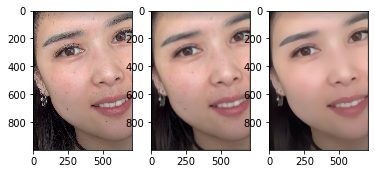

In [5]:
img_blur = gaussian_filter(img,11,5)#中间的参数越大图片越容易模糊
img_bi = cv2.bilateralFilter(img_blur,0,40,25)#最后一个参数主要影响磨皮去色斑效果
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(img_blur)
plt.subplot(1,3,3)
plt.imshow(img_bi)
print(img_bi.shape)
img_bi = cv2.cvtColor(img_bi,cv2.COLOR_BGR2RGB)
cv2.imwrite("homework_processed.png",img_bi)

(1000, 707, 3)
(1000, 707, 3)


True

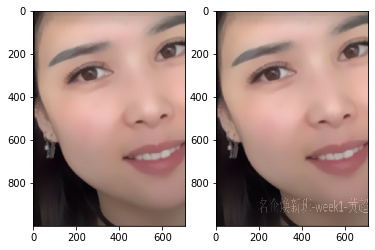

In [6]:
img2 = cv2.imread("homework_processed.png")
img2_RGB = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(img2_RGB)
wm = cv2.imread("mask1.png")
wm = cv2.resize(wm,(707,1000))
wm = 255-wm
print(wm.shape)
print(img2_RGB.shape)
#img2_mask = cv2.add(wm,img2_RGB)
img2_mask = cv2.addWeighted(wm,0.2,img2_RGB,1,0)
plt.subplot(1,2,2)
plt.imshow(img2_mask)
#plt.imshow(cv2.addWeighted(wm,0.5,img2_RGB,0.9,0))
img2_mask = cv2.cvtColor(img2_mask,cv2.COLOR_BGR2RGB)
cv2.imwrite("homework_processed_mask.png",img2_mask)